# The MNIST handwritten digit classification problem

## Content

1. One and Three Layer models
    - One-layer neural networks (i.e., logistic regression)
    - Build a three-layer feedforward network: [2 points]

2. Add more convolutional layers
    - Add convolutional layers to this network, and compare the results with those without convolution. [3 points]
    - Comments: The number of convolutional layers can be 1/2/3. You only need to test one of them.

## Q1.1 One-layer neural networks (i.e., logistic regression)

#### 1. Selected a software framework for the implementation
• Selected framework: Tensorflow “https://www.tensorflow.org/”

reason: using tensorflow gpu hence can utilise available gpus on the computing platform

In [1]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

TensorFlow version: 2.1.0


#### 2. Download the benchmark dataset MNIST from “ http://yann.lecun.com/exdb/mnist/ ”.

#### 3. Implement **multiclass logistic regression** and try it on MNIST. 
- MNIST is a standard dataset for machine learning and also deep learning. 
- It is good to try it on **one-layer neural networks (i.e., logistic regression)** before multilayer neural networks. 
- Downloading the dataset from other places in preprocessed format is allowed, but practicing how to read the dataset prepares you for other new datasets you may be interested in. 
- Also, it is recommended to try different **initializations** and **learning rates** to get a sense of how to tune the hyperparameters 
- (remember to create and use validation dataset!).

In [2]:
from sklearn.datasets import fetch_openml

# downloading mnist dataset
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554
# Note download MINST dataset later and try running the model from http://yann.lecun.com/exdb/mnist/

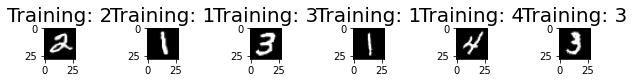

In [3]:
# input images:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[5:11], mnist.target[5:11])):
    plt.subplot(6, 11, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20)

In [4]:
X=mnist.data
y=mnist.target.astype('int')

In [5]:
X.shape

(70000, 784)




#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [6]:
from tensorflow.keras.utils import to_categorical

#reshape dataset to have a single channel
X=X.reshape((X.shape[0], 784))
#one hot encode target values
y=to_categorical(y)
X.shape

In [7]:
# Split dataset into training, vaildation, testing datasets
from sklearn.model_selection import train_test_split

DATASET_SIZE = 70000
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.1

# NOTE: Check the distribution of validation set it should be close to test set

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

# Source: https://stackoverflow.com/questions/65539305/mnist-dataset-splitting

In [9]:
print("Training: ",X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Testing:", X_test.shape, y_test.shape)

Training:  (56000, 784) (56000,)
Validation: (7000, 784) (7000,)
Testing: (7000, 784) (7000,)


In [10]:
# instead of above use following one for development since to divide data into validation too

### Predicting on full MNIST database
In this section, we will download and play with the full MNIST dataset. Downloading for the first time from open ml db takes me about half a minute. Since this dataset is cached locally, subsequent runs should not take as much.


Source for code refered to: https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/

from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

mnist.data

mnist.target

In [11]:
print("MNIST data shape:", mnist.data.shape, "MNIST target shape:", mnist.target.shape)

MNIST data shape: (70000, 784) MNIST target shape: (70000,)


In [12]:
type(mnist)

sklearn.utils.Bunch

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

    plt.title('Training: ' + str(label), fontsize = 20)

#Split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=0.20, shuffle=False,
                                                   random_state=333)

In [13]:
X_train.shape, X_test.shape

((56000, 784), (7000, 784))

#### Are the different classes evenly distributed? We can find this by plotting a histogram of the labels in both test and training datasets.

Text(0.5, 1.0, 'Frequency of different classes - Test data')

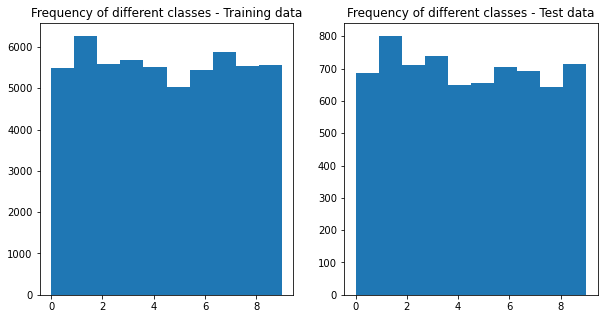

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train)
plt.title('Frequency of different classes - Training data')
plt.subplot(1,2,2)
plt.hist(y_test)
plt.title('Frequency of different classes - Test data')

In [26]:
#Single Layer Score against training, validation and test data

In [16]:
mdlLogiRegTuned = LogisticRegression(
                                     fit_intercept=True,
                                     multi_class='auto',
                                     penalty='l1', #lasso regression
                                     solver='saga',
                                     max_iter=1000,
                                     C=50,
                                     verbose=2, # output progress
                                     n_jobs=5, # parallelize over 5 processes
                                     tol=0.01,
                                     warm_start=True    #When set to True, reuse the 
                                     # solution of the previous call to fit as initialization, otherwise, 
                                     # just erase the previous solution.
                         )
# Since there are 10 classes and 12 available cores, we will try to run the learning step in 5 jobs. 
# Earlier, when I did not parallelize, the job did not finish within 1 hour, 
# when I had to put the machine to sleep for a meeting.

mdlLogiRegTuned

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2, warm_start=True)

In [17]:
%time mdlLogiRegTuned.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 54 epochs took 282 seconds
Wall time: 4min 41s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  4.7min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2, warm_start=True)

In [18]:
# Let us see what the classifier has learned
mdlLogiRegTuned.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
mdlLogiRegTuned.coef_.shape

(10, 784)

In [20]:
#Get the coefficients for a single class, 1 in this case:
mdlLogiRegTuned.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.001, -0.001, -0.001,  0.001,  0.004,  0.001,  0.002,
        0.003,  0.001,  0.   ,  0.001,  0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.001, -0.001, -0.001, -0.001, -0.001, -0.003,
        0.001,  0.001, -0.001,  0.   ,  0.003, -0.001, -0.004, -0.   ,
       -0.001, -0.001, -0.002, -0.001, -0.001, -0.   ,  0.   ,  0.   ,
      

In [21]:
mdlLogiRegTuned.intercept_ # for 10 classes - this is a One-vs-All classification

array([-1.09554813e-04,  1.25977274e-04,  1.23767179e-04, -2.25586789e-04,
        7.89024898e-05,  8.71769281e-04, -6.87702012e-05,  3.01994910e-04,
       -8.76795743e-04, -2.21703587e-04])

In [22]:
mdlLogiRegTuned.n_iter_[0] # num of iterations before tolerance was reached

54

Text(0.5, 0.98, 'Coefficients for various classes')

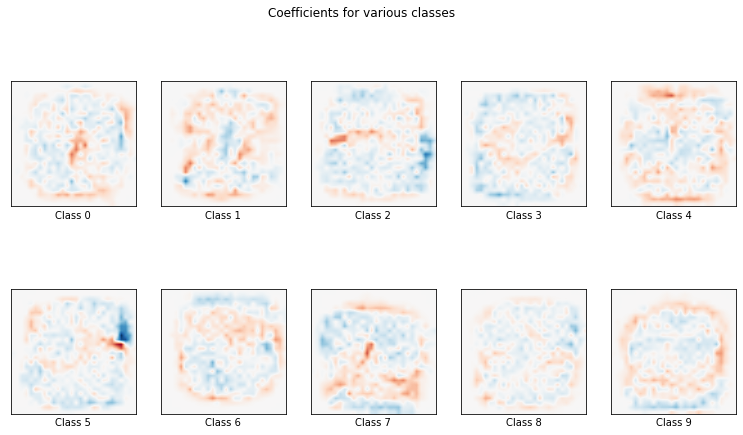

In [23]:
# Visualize coefficients as an image
coef = mdlLogiRegTuned.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes')

### Prediction and scoring
Now predict on unknown dataset and compare with ground truth

In [24]:
print(mdlLogiRegTuned.predict(X_test[0:9]))
print(y_test[0:9])

[3 0 4 1 7 7 5 7 6]
[3 0 4 1 7 7 5 7 6]


### Score against training and test data

training score:  0.9378214285714286
testing score :  0.9215714285714286
Confusion matrix:


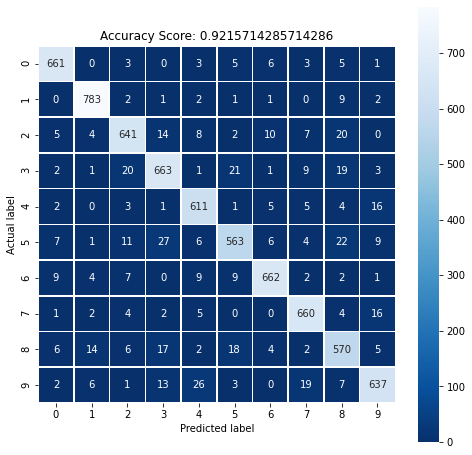

In [37]:
def get_scores_for_single_layer(mdl, X_train, y_train, X_test, y_test):
    # ------------- Calculate and print scores ---------------
    print("training score: ", mdl.score(X_train, y_train)) # training score
    print("testing score : ", mdl.score(X_test, y_test))    # test score
    
    # ------------- Calculate Confusion matrix print ------------
    from sklearn import metrics
    predictions = mdl.predict(X_test)
    
    print("Confusion matrix:")
    cm = metrics.confusion_matrix(y_true=y_test, y_pred = predictions, labels = mdl.classes_)
    import seaborn as sns

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(mdlLogiRegTuned.score(X_test, y_test))
    plt.title(all_sample_title)

    return predictions

y_pred=get_scores_for_single_layer(mdlLogiRegTuned, X_train, y_train, X_test, y_test)

#### Observation:
- Shows performing multi-class classification using logistic regression using one-vs-all technique. 
- When run on MNIST DB, the best accuracy is still just 91%. 
- There is still scope for improvement.

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
def metric_report(yTest, yPred):
    print(f'accuracy: {accuracy_score(yTest, yPred)}')
    print('')
    print("Classification report: \n\n", metrics.classification_report(yTest, yPred))
    print('')
    #confusion_matrix = metrics.confusion_matrix(yTest, yPred)
    #print("Confusion matrix: \n\n", confusion_matrix)
    
# model_name == 'Multinomial Naive Bayes':
metric_report(y_test, y_pred)

accuracy: 0.9215714285714286

Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       687
           1       0.96      0.98      0.97       801
           2       0.92      0.90      0.91       711
           3       0.90      0.90      0.90       740
           4       0.91      0.94      0.93       648
           5       0.90      0.86      0.88       656
           6       0.95      0.94      0.95       705
           7       0.93      0.95      0.94       694
           8       0.86      0.89      0.87       644
           9       0.92      0.89      0.91       714

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000




#### Observation:
1. Above is the score for each class (0-9) predictions. It can be seen model is having low score predicting 8 compared to other numbers.

## 1.2 Build a three-layer feedforward network: [2 points]  

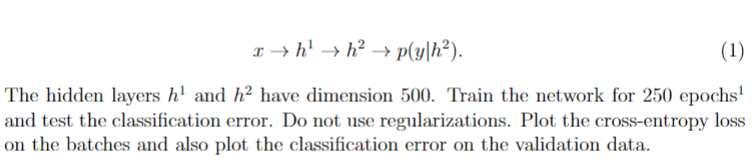
1 Each epoch is a pass over the training data. Suppose you use batches of size b, and the training data set
has n points, then an epoch consists of n/b batches. Note that you can divide the data set into batches and
then round-robin over the batches. You can also randomly sample, say 64 points for each batch. Either way
is OK, and typically there is no performance difference between them. When these batches are randomly
sampled, it is possible that some points are not in any of them, but we still call these batches a pass over
the data.

### Repeat the above experiment: 
But train the network with the following regularizations and compare with the results in the previous experiment: 
- L2 regularization [2.5 points]
- dropout [2.5 points]
Comments: no need to implement them on your own; the software framework typically provides implementations for L2 regularization and dropout. Early stopping is done in training, so you only need to tune your training code slightly.

In [40]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model(floatLearningRate):
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    print("Model summary:\n", model.summary())
    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, floatLearningRate, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model(floatLearningRate)
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
    return

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
    return

# run the test harness for evaluating a model
def run_test_harness(floatLearningRate):
    
    # 1. load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # 2. prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # 3. evaluate model
    scores, histories = evaluate_model(trainX, trainY, floatLearningRate)
    
    # 4. learning curves
    summarize_diagnostics(histories)
    
    # 5. summarize estimated performance
    summarize_performance(scores)
     
    return 



> 98.542
> 98.650
> 98.708
> 98.783
> 98.733


C:\Users\yoges\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\yoges\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


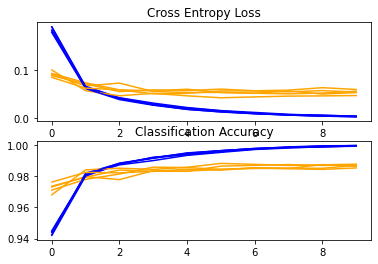

Accuracy: mean=98.683 std=0.083, n=5


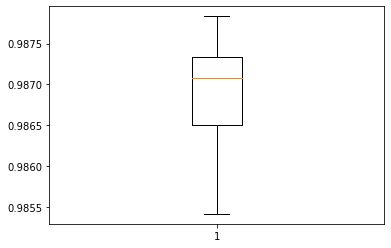

Wall time: 3min 24s


In [41]:
# setting learning rate
floatLearningRate=0.1

# entry point, run the test harness
%time run_test_harness(floatLearningRate)

# Q2 Question
1. Add convolutional layers to this network, and compare the results with those without convolution. [3 points]

Comments: The number of convolutional layers can be 1/2/3. You only need to test one of them. 

In [47]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    print("training shape: ", trainY.shape, " testing shape: ", testY.shape)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model(floatLearningRate):
    
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, floatLearningRate, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model(floatLearningRate)
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    
    print("Model summary:\n", model.summary())
    
    return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
    return

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
    return

# run the test harness for evaluating a model
def run_test_harness(floatLearningRate):
    
    # 1. load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # 2. prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # 3. evaluate model
    scores, histories = evaluate_model(trainX, trainY, floatLearningRate)
    
    # 4. learning curves
    summarize_diagnostics(histories)
    
    # 5. summarize estimated performance
    summarize_performance(scores)
     
    return 



training shape:  (60000, 10)  testing shape:  (10000, 10)
> 98.917
> 99.025
> 99.025
> 99.167
> 99.083
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
________________

C:\Users\yoges\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\yoges\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


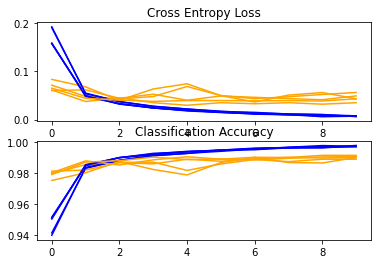

Accuracy: mean=99.043 std=0.082, n=5


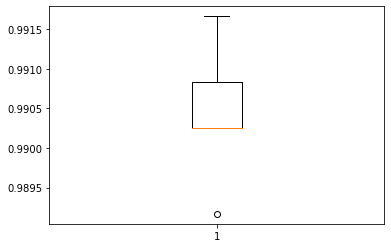

Wall time: 9min 49s


In [48]:
# setting learning rate
floatLearningRate=0.1

# entry point, run the test harness
%time run_test_harness(floatLearningRate)

# Additional Work: train-validation-testing on LeNet-5 variations

### Original LeNet5

LeNet-5 - GradientBased Learning Applied to Document Recognition (Yann LeCun Leon Bottou Yoshua Bengio and Patrick Haffner) (http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

[LeNet-5] Original Architecture
ConvNet --> Pool --> ConvNet --> Pool --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax

In [49]:
def LeNet5(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Modified Architecture -- ConvNet --> Pool --> ConvNet --> Pool --> (Flatten) --> FullyConnected --> FullyConnected --> Softmax 

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), name = 'convolution_1'),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
        
    # Layer 2
    Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', name = 'convolution_2'),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
        
    # Layer 3
    Flatten(name = 'flatten'),
    Dense(units = 120, activation = 'relu', name = 'fully_connected_1'),
        
    # Layer 4
    Dense(units = 84, activation = 'relu', name = 'fully_connected_2'),
    
    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5'

    return model

In [50]:
LeNet5Model = LeNet5(input_shape = (32, 32, 1), classes = 10)
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet5Model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 6)         156       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 14, 14, 6)         0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fully_connected_1 (Dense)    (None, 120)               48120     
_________________________________________________________________
fully_connected_2 (Dense)    (None, 84)                10164

Size of Dataset:  42000
Size of Cross Validation Set:  2100


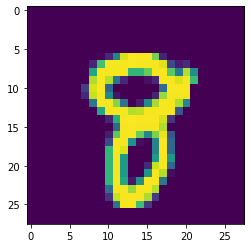

In [52]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y = train[['label']]
X = train.drop(train.columns[[0]], axis=1)

X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("Size of Dataset: " , len(X))

cross_validation_size = int(len(X)*0.05)

print("Size of Cross Validation Set: " , cross_validation_size)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = cross_validation_size, random_state=random_seed)

X_test = test

plt.imshow(X_train[0][:,:,0])

In [53]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [55]:
# By using the image generator, we are not generating new data. We are only replacing the exisiting images. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [62]:
%time history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

Train on 39900 samples, validate on 2100 samples
Epoch 1/30
39900/39900 [==============================] - 3s 70us/sample - loss: 0.2247 - accuracy: 0.9314 - val_loss: 0.0658 - val_accuracy: 0.9814
Epoch 2/30
39900/39900 [==============================] - 2s 51us/sample - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0648 - val_accuracy: 0.9810
Epoch 3/30
39900/39900 [==============================] - 2s 52us/sample - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 4/30
39900/39900 [==============================] - 2s 52us/sample - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0353 - val_accuracy: 0.9867
Epoch 5/30
39900/39900 [==============================] - 2s 52us/sample - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.0427 - val_accuracy: 0.9848
Epoch 6/30
39900/39900 [==============================] - 2s 52us/sample - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0515 - val_accuracy: 0.9852
Epoch 7/30
39900/39900 [==============================] -

<Figure size 432x288 with 0 Axes>

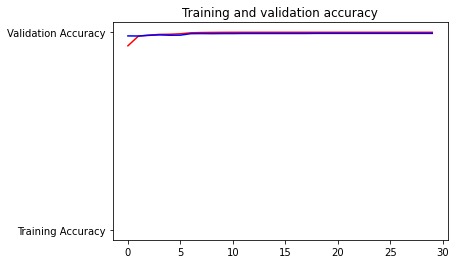

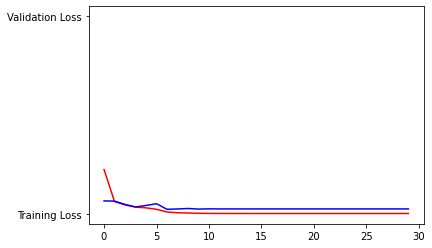

<Figure size 432x288 with 0 Axes>

In [63]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

## Modified LeNet-5

In [70]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 10):
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
    """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    
    # Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),
    
    # Layer 3    
    BatchNormalization(name = 'batchnorm_1'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- #  
        
    # Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
        
    # Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
        
    # Layer 5
    BatchNormalization(name = 'batchnorm_2'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- #  
        
    # Layer 6
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
        
    # Layer 7
    BatchNormalization(name = 'batchnorm_3'),
    
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 8
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
        
    # Layer 9
    BatchNormalization(name = 'batchnorm_4'),
        
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 10
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
        
    # Layer 11
    BatchNormalization(name = 'batchnorm_5'),
        
    # -------------------------------- #  
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    # -------------------------------- #  

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5v2'

    return model

In [72]:
LeNet5ModelV2 = LeNet5v2(input_shape = (32, 32, 1), classes = 10)
LeNet5ModelV2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet5ModelV2.summary()

Model: "LeNet5v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 32)        832       
_________________________________________________________________
convolution_2 (Conv2D)       (None, 24, 24, 32)        25600     
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 10, 10, 64)        184

In [73]:
%time history = LeNet5ModelV2.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))

Train on 39900 samples, validate on 2100 samples
Epoch 1/30
39900/39900 [==============================] - 6s 155us/sample - loss: 0.2716 - accuracy: 0.9291 - val_loss: 0.0774 - val_accuracy: 0.9843
Epoch 2/30
39900/39900 [==============================] - 4s 101us/sample - loss: 0.0974 - accuracy: 0.9776 - val_loss: 0.0538 - val_accuracy: 0.9910
Epoch 3/30
39900/39900 [==============================] - 4s 103us/sample - loss: 0.0736 - accuracy: 0.9830 - val_loss: 0.0508 - val_accuracy: 0.9900
Epoch 4/30
39900/39900 [==============================] - 4s 102us/sample - loss: 0.0659 - accuracy: 0.9850 - val_loss: 0.0435 - val_accuracy: 0.9905
Epoch 5/30
39900/39900 [==============================] - 4s 102us/sample - loss: 0.0546 - accuracy: 0.9870 - val_loss: 0.0412 - val_accuracy: 0.9914
Epoch 6/30
39900/39900 [==============================] - 4s 102us/sample - loss: 0.0526 - accuracy: 0.9874 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 7/30
39900/39900 [===========================

<Figure size 432x288 with 0 Axes>

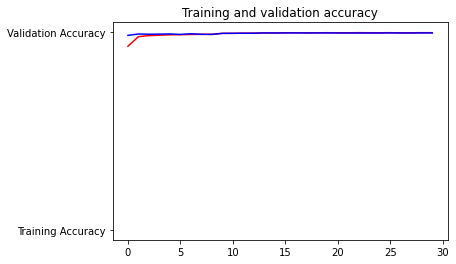

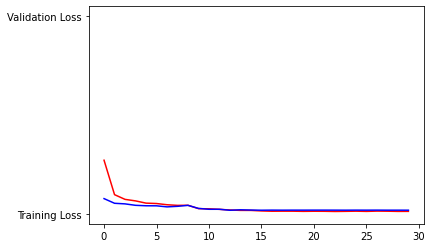

<Figure size 432x288 with 0 Axes>

In [74]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()